#Séries Temporais: Parte 2 - Técnicas de Forecasting.

Continuando com os estudos sobre a imensa área das Séries Temporais, decidimos abordar um pouco sobre algumas das Técnicas de Forecasting (Técnicas de Previsão) que podem vir a ser adotadas ao analisarmos qualquer série histórica.

Devemos sempre nos atentar que todo método de predição sempre conterá uma taxa de erro e, para as Séries Temporais, não seria diferente.

Alguma das técnicas que serão abordadas aqui são: **Naive Approach**, **Média Movel** e **Holt's Linear Model**. Para mensuramos o quão impreciso um modelo pode ser, utilizaremos a [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) ou, em português, [Erro Quadrático Médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio).

##Importando as Bibliotecas Essenciais:

Nesse começo utilizaremos as bibliotecas essenciais para manipulação do Dataset (Pandas) e elaboração de gráficos (Pyplot). Na medida em que decorrermos o Notebook, serão importadas novas bibliotecas com a finalidade de manter as bibliotecas necessárias proximas das suas respectivas linhas de código e utilização.

In [0]:
#Importando Pandas e o Pyplot, inicialmente:
import pandas as pd
import matplotlib.pyplot as plt

##Importando o Dataset:

O Dataset disponibilizado pelo Professor Carlos Melo se refere ao consumo de energia elétrica ao decorrer dos mêses. **Esse Dataset é o mesmo Dataset disponibilizado na primeira parte da primeira aula de Séries Temporais.**

In [0]:
# url do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

# importar o csv para um dataframe
df = pd.read_csv(dataset_path)

###Visualizando as Primeiras 5 entradas:

Para recordamos como esse Dataset foi estruturado, utilizaremos o atributo: ".head()" para visualizarmos as primeiras 5 entradas.

In [3]:
#Visualizando as 5 primeiras entradas:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


###Formatando a Variável DATE:

Como visto na aula anterior, devemos padronizar a Data disponibilizada para um padrão Datetime. Após essa correção, é retirada a coluna DATE pois a mesma se encontrará no Index do DataFrame.

In [0]:
#Formatando a Data:
df.index = pd.to_datetime(df.DATE, format = "%m-%d-%Y")

#Retirando a coluna DATE:
df.drop("DATE", axis = 1, inplace = True)

##Forecast Naive:

Esse é o primeiro método que abordamos nessa aula. O Forecast Naive ou Método Ingênuo, essa técnica recebe esse nome devido a adoção do ultimo valor disponível para prever os próximos valores e, por conta disso, **desconsidera qualquer componente de um Time Series (Tendência, Sazonalidade e Ruídos).**

Para começarmos, separaremos o Dataset em duas partes: **Treino (`train`) e Validação (`valid`).**

Inicialmente o  Dataframe de Predição (`y_hat`) é criado através de uma cópia do DataFrame de Validação, para que assim, possamos ter a mesma quantidade de Instâncias (linhas).

O Método Naive (`y_hat['naive']`) **pega o ultimo valor do valor de Treino** e replica para as demais datas, para que assim, possamos comparar os valores de Validação.

In [0]:
#Criando o DataFrame de Treino e Validação:
train = df[df.index <= '2012-8-1']
valid = df[df.index > '2012-8-1']

#Criando o DataFrame com o método Naive.
y_hat = valid.copy()

#Adotando o ultimo valor de Treino:
y_hat['naive'] = train.iloc[-1].values[0]

###Gráfico do Naive Approach:

Para facilitar o entedimento do Método Naive é plotado o seguinte gráfico:

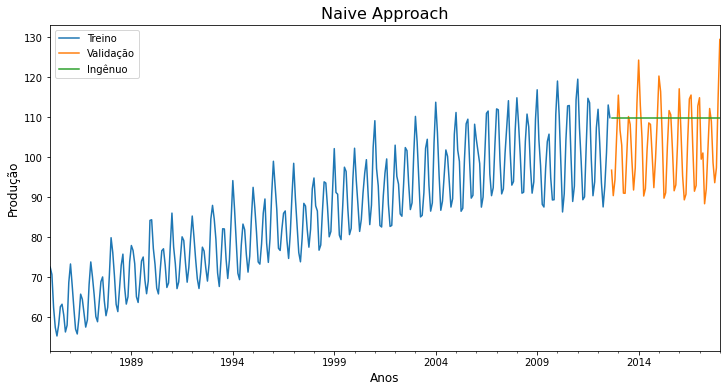

In [6]:
#Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (12,6))

#Inserindo as variáveis do Gráfico:
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['naive'].plot(ax=ax)

#Inserindo Legenda:
plt.legend(['Treino', 'Validação', 'Ingênuo'])
plt.title('Naive Approach', fontsize=16)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Produção', fontsize=12);

###Qual o valor do Erro Quadrático Médio (Mean Squared error):

Esse é uma das verificações que podemos utilizar para percebemos o quanto nossa previsão está precisa. O Erro Quadrático Médio pega a distância do valor real (`y_hat.Value`) com o valor previsto (`y_pred`da biblioteca, ou `y_hat.naive`) e eleva ao quadrado.

Ao elevar essa distância ao quadrado, **pontos que estão próximos proporcionarão valores menores**. Porém, **quanto maior a distância, maior será o Erro obtido.**

In [7]:
#Importando a biblioteca necessária para calcular esse EQM:
from sklearn.metrics import mean_squared_error

#Imprimindo o EQM:
print("R² = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.naive, squared=True)))

R² = 144.183


##Média Movel:

A Média Móvel é um Método de Previsão simples assim como o anterior, mas a diferença entre esses dois modelos é que: na Média Móvel é **utilizada uma janela de intervalo para prever o período seguinte**. Esse intervalo pode ser de horas, dias, anos e assim por diante.

Para os nossos estudos utilizaremos janelas de 7, 14 e 30 dias e compararemos os resultados entre cada um deles. 

###Dos ultimos 7 dias:

Começando com um intervalo de 7 dias, criaremos uma coluna no DataFrame `y_hat`e denominaremos essa coluna de **`m7`**.

Para buscarmos o agrupamento de 7 atributos, utilizamos a função: `.rolling(7)` em que o argumento (o valor dentro do parenteses) pode ser qualquer número. Mas atente-se que ele irá pegar 7 Instâncias (7 linhas do Dataset) e não 7 Dias. Então ao utilizar **essa função é importante saber o intervalo de cada linha do seu Dataset.**

Em seguida é calculada a média (`mean()`) dos termos para que assim, peguemos o ultimo valor `[-1]`.

In [0]:
#Criando uma coluna com a ultima Média Móvel de 7 dias:
y_hat["m7"] = train.Value.rolling(7).mean().iloc[-1]

####Gráfico da Média Móvel de 7 dias:

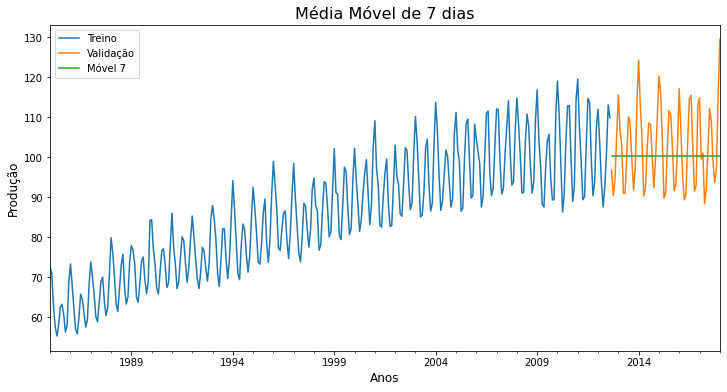

In [9]:
#Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (12,6))

#Inserindo as variáveis do Gráfico:
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat.m7.plot(ax=ax)

#Inserindo Legenda:
plt.legend(['Treino', 'Validação', 'Móvel 7'])
plt.title('Média Móvel de 7 dias', fontsize=16)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Produção', fontsize=12);


####Erro Quadrático Médio de 7 dias:

In [10]:
#Imprimindo o EQM:
print("R² = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.m7, squared=True)))

R² = 101.213


###Dos ultimos 14 dias:

Após utilizarmos a janela de intervalo de 7 dias, iremos testar com a janela de 14 dias.

In [0]:
#Criando uma coluna com a ultima Média Móvel de 14 dias:
y_hat["m14"] = train.Value.rolling(14).mean().iloc[-1]

####Gráfico da Média Móvel de 14 dias:

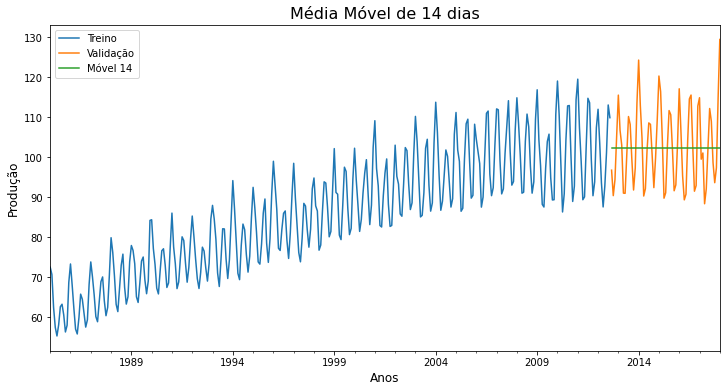

In [12]:
#Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (12,6))

#Inserindo as variáveis do Gráfico:
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat.m14.plot(ax=ax)

#Inserindo Legenda:
plt.legend(['Treino', 'Validação', 'Móvel 14'])
plt.title('Média Móvel de 14 dias', fontsize=16)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Produção', fontsize=12);

####Erro Quadrático Médio de 14 dias:

In [13]:
#Imprimindo o EQM:
print("R² = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.m14, squared=True)))

R² = 94.595


###Dos ultimos 30 dias:

Por ultimo, iremos verificar a Janela de 30 dias. O procedimento é semelhante aos demais anteriores:

In [0]:
#Criando uma coluna com a ultima Média Móvel de 14 dias:
y_hat["m30"] = train.Value.rolling(30).mean().iloc[-1]

####Gráfico da Média Móvel de 30 dias:

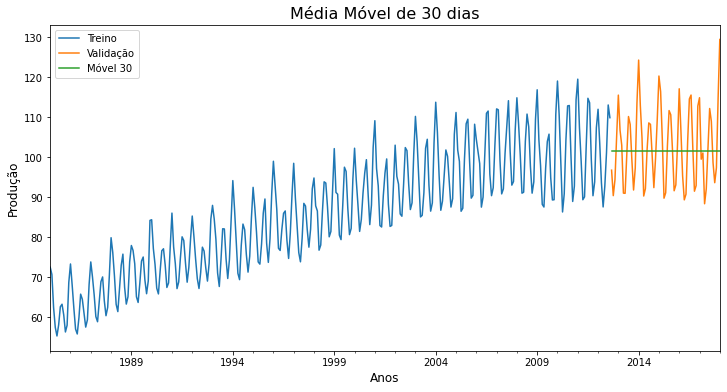

In [15]:
#Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (12,6))

#Inserindo as variáveis do Gráfico:
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat.m30.plot(ax=ax)

#Inserindo Legenda:
plt.legend(['Treino', 'Validação', 'Móvel 30'])
plt.title('Média Móvel de 30 dias', fontsize=16)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Produção', fontsize=12);

####Erro Quadrático Médio de 30 dias:

In [16]:
#Imprimindo o EQM:
print("R² = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.m30, squared=True)))

R² = 96.298


##Holt's Linear Model:

Esse tipo de modelo permite trabalhos, predições ou especulações das futuras variáveis através da linha de tendência, para isso, usamos a biblioteca do Statsmodels `holtwinters`.

In [0]:
#Importando a Biblioteca para Determinar os componentes do TS:
from statsmodels.tsa.seasonal import seasonal_decompose

#Importando a Biblioteca para Utilizar Holt's Linear Model:
from statsmodels.tsa.holtwinters import Holt

###Gráfico de Tendência, Sazonalidade e Ruídos:

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

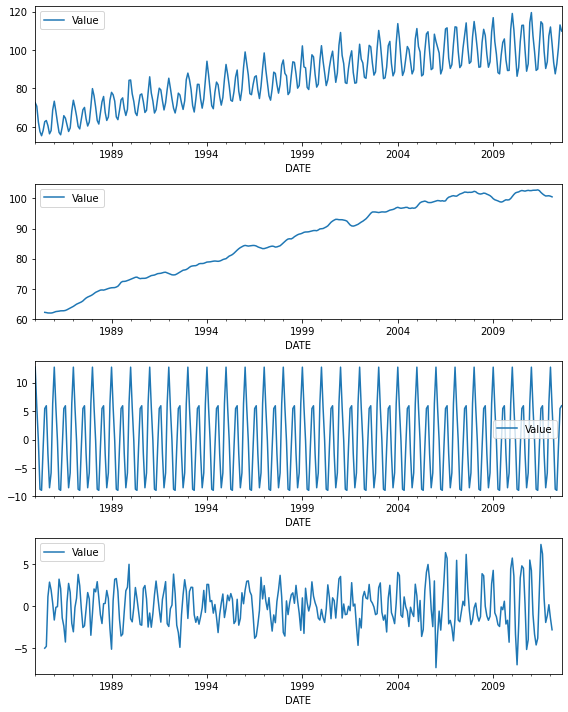

In [19]:
#Gerando os componentes da Time Series:
result = seasonal_decompose(train)

#Plotando os componentes da Time Series:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(8,10))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

###Criando a Coluna Holt com a função:

In [20]:
#Criando a Coluna Holt:
y_hat['Holt'] = Holt(train.Value).fit(smoothing_level=0.1, smoothing_slope=0.1).forecast(len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


###Gráfico do Holt's Linear Model:

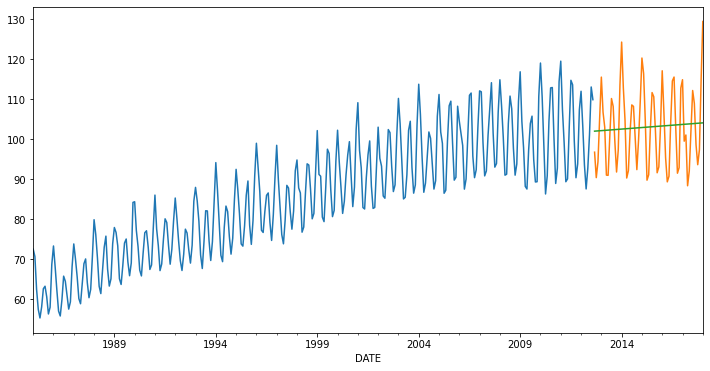

In [21]:
#Criando a figura no pyplot
fig, ax = plt.subplots(figsize=(12,6))

#Setando as variáveis em ax:
train.Value.plot(ax=ax)
valid.Value.plot(ax=ax)
y_hat['Holt'].plot(ax=ax)

#Corrigindo as legendas e Titulos
plt.legend(['Treino', 'Validação', 'Holt'])
plt.title('Holt Linear Model', fontsize = 14)
plt.xlabel('Datas', fontsize = 12)
plt.ylabel('Produção', fontsize = 12);

In [22]:
#Imprimindo o EQM:
print("R² = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.Holt, squared=True)))

R² = 93.792


##Séries Estacionárias:

As Séries Estacionárias são um tipo de Time Series onde as médias, variância e efeitos de sazonalidade apresentam **valores quase constantes**. Para sabermos se uma Série é Estacionária ou não, utilizamos o **Teste de Dickey-Fuller**.

##Teste de Dickey Fuller:

Esse Teste é capaz de indicar se a Série é Estacionária ou não. Para isso, definimos uma Hipótese Nula (`Ho`) e uma Hipótese Alternativa (`H1`).

* `Ho` - É a Hipótese que a Time Series não é estacionária;
* `H1` - Rejetiamos a Hipótese Nula (TS pode ser Estacionária).

Para podermos verificarmos essa hipótese, calculamos o **valor de `p`**:

* $\text{Valor-p } \leq 0.05$ - Rejeitamos a Hipótese Nula.
* $\text{Valor-p } > 0.05$ - Não Rejeitamos a Hipótese Nula. 

In [0]:
#Importando a Biblioteca:
from statsmodels.tsa.stattools import adfuller

#Lendo o Dataset novamente:
df_est = pd.read_csv(dataset_path, index_col=0, squeeze=True)

In [0]:
#Extrair os valores que serão analisados no DataFrame:
X = df_est.values

In [25]:
#Aplicando a função pra retornar os valores Estatísticos:
result = adfuller(X)

print("Obtemos os seguintes resultados:")
print("Teste Estatístico: {:.4f}".format(result[0]))
print("Valor p: {:.4f}".format(result[1]))
print("Valores Criticos:")
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Obtemos os seguintes resultados:
Teste Estatístico: -2.2570
Valor p: 0.1862
Valores Criticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708
